In [ ]:

# print('start_time: ', start_time)



import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
!pip install ncps
from ncps.tf import LTC, CfC
from ncps import wirings
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import torch
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import sys
import pickle
import torch
from torch import nn, optim
from torchvision import transforms
from collections import OrderedDict
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Use GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)



## Transforms features by scaling each feature to a given range.
## This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one.
## This transformation is often used as an alternative to zero mean, unit variance scaling.
## fit(X[, y])	Compute the minimum and maximum to be used for later scaling.
## transform(X)	Scaling features of X according to feature_range.
## fit_transform(X[, y])	Fit to data, then transform it.
## inverse_transform(X)	Undo the scaling of X according to feature_range.
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()



no_of_output_nodes = 8192

df_1 = pd.read_excel('//content/drive/MyDrive/LTC 3 MATERIAL/SCG DATA 3 MATERIAL.xlsx', sheet_name='training')
datafile_1 = df_1.values                  ## stored data from xlsx file


##########    taking data from other sheets    #############


print(datafile_1)
print(len(datafile_1))
print()



########   just to see output variable values   ##########
out_var_datafile_1 = datafile_1[:,range(6,8198)]              ## stored output_variable (4th column) from xlsx file
out_var_datafile_1 = out_var_datafile_1.reshape((-1,no_of_output_nodes))    ## one column with unknown no. of rows
print(out_var_datafile_1)
print('no. of training points: ', len(out_var_datafile_1))


scaler1.fit(datafile_1)
scaler2.fit(out_var_datafile_1)


scaler_datafile_1 = scaler1.transform(datafile_1)
X = scaler_datafile_1[:,range(1,6)]                 ## input variables columns
y = scaler_datafile_1[:,range(6,8198)]                          ## output variables columns

print(X)
print()
print(y)


X, y = shuffle(X, y)
X_train, X_validation, y_train, y_validationidation = train_test_split(X, y, test_size = 0.1)
X_train = X_train.reshape(-1, 5)                                ## 2nd column value is = no. of input variables columns
y_train = y_train.reshape(-1, no_of_output_nodes)               ## 2nd column value is = no. of output variables columns
X_validation = X_validation.reshape(-1, 5)                      ## 2nd column value is = no. of input variables columns
y_validation = y_validationidation.reshape(-1, no_of_output_nodes)     ## 2nd column value is = no. of output variables columns
print('no. of training points: ', len(X_train))
print('no. of validation points: ', len(X_validation))


###########     manual testing    #########
df_2 = pd.read_excel('/content/drive/MyDrive/LTC 3 MATERIAL/SCG DATA 3 MATERIAL.xlsx', sheet_name='testing')
datafile_2 = df_2.values                  ## stored data from xlsx file
print(datafile_2)
scaler_datafile_2 = scaler1.transform(datafile_2)
X_test = scaler_datafile_2[:,range(1,6)]            ## input variables columns
y_test = scaler_datafile_2[:,range(6,8198)]                     ## output variables columns
print(X_test)
print()
print(y_test)
print('no. of test points: ', len(X_test))
X_test = X_test.reshape(-1, 5)                      ## 2nd column value is = no. of input variables columns
y_test = y_test.reshape(-1, no_of_output_nodes)     ## 2nd column value is = no. of output variables columns
###########################################




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.2 MB/s eta 0:00:00
cuda
[[ 1.00000000e+00  1.00000000e+00  1.55000000e+03 ... -3.07499838e+02
  -3.10205835e+02 -3.17571906e+02]
 [ 2.00000000e+00  1.00000000e+00  1.55000000e+03 ... -3.07134148e+02
  -3.10763285e+02 -3.17155735e+02]
 [ 3.00000000e+00  1.00000000e+00  1.55000000e+03 ... -3.07078396e+02
  -3.09724193e+02 -3.16877731e+02]
 ...
 [ 8.63700000e+03  3.00000000e+00  1.55000000e+03 ... -1.17181874e+02
  -1.14885760e+02 -1.13837992e+02]
 [ 8.63800000e+03  3.00000000e+00  1.55000000e+03 ... -1.17299322e+02
  -1.14338071e+02 -1.13777597e+02]
 [ 8.63900000e+03  3.00000000e+00  1.55000000e+03 ... -1.17837098e+02
  -1.14780990e+02 -1.14028727e+02]]
8613

[[-356.59874438 -315.35921365 -311.13020944 ... -307.49983844
  -310.20583494 -317.57190562]
 [-356.59874438 -315.47831217 -311.19874879 ... -307.13414787
  -310.7632852  -317.15573466]
 [-359.08411435 -315.50134368 -311.26480808 ... -307.07839583
  -309.72419264 -316.8777

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 200)            161600    
                                                                 
 lstm_1 (LSTM)               (None, 5, 200)            320800    
                                                                 
 lstm_2 (LSTM)               (None, 200)               320800    
                                                                 
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 512)               102912    
                                                                 
 dense_1 (Dense)             (None, 8192)              4202496   
                                                                 
Total params: 5108608 (19.49 MB)
Trainable params: 51086

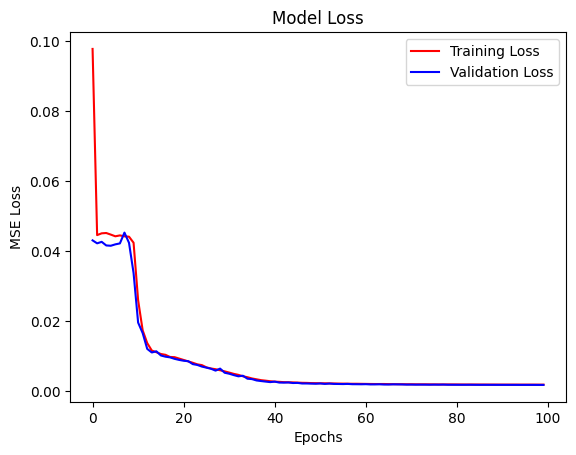

(27, 8192)
1/1 [==============================] - 0s 28ms/step - loss: 0.0017


<ipython-input-2-70827c4765d7>:168: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


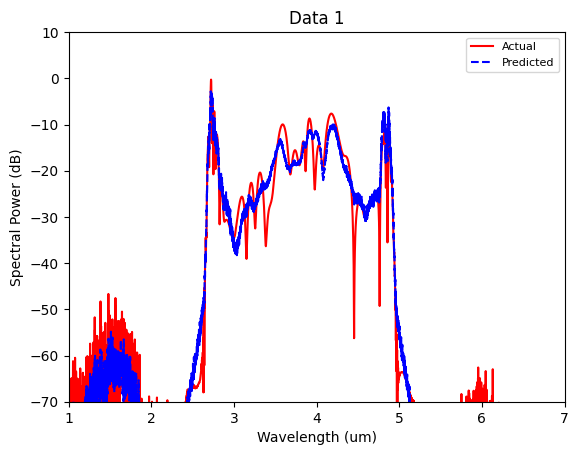

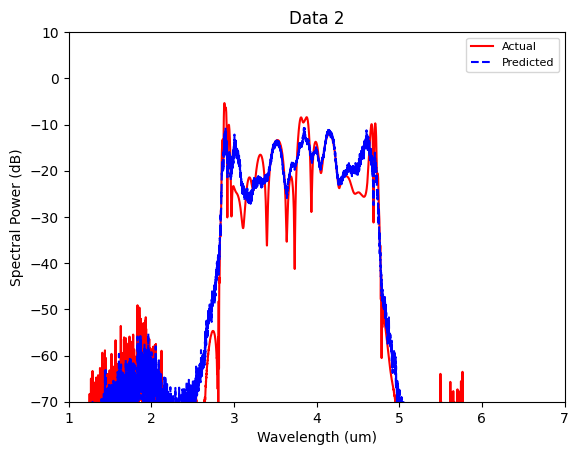

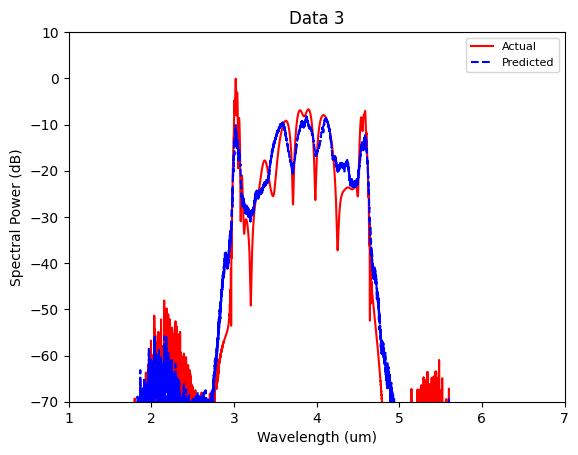

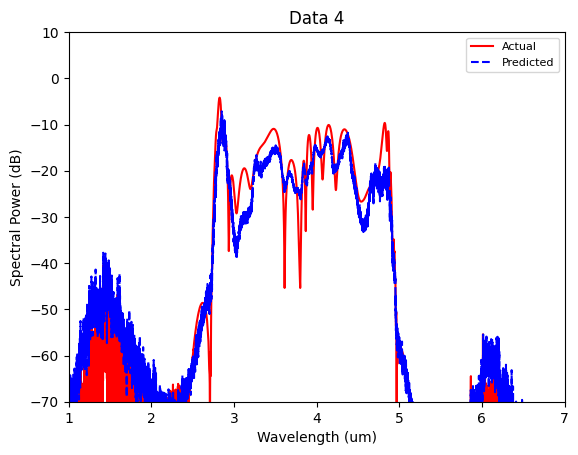

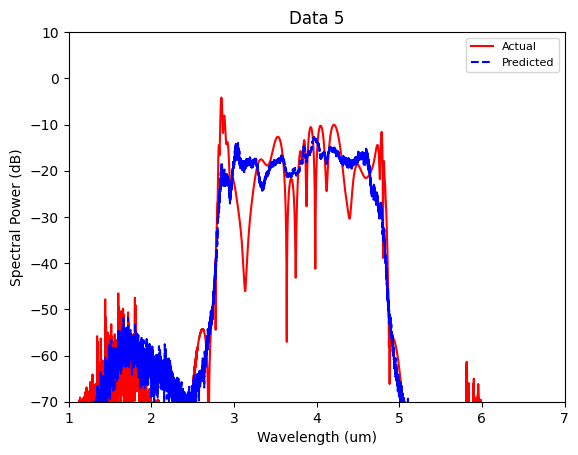

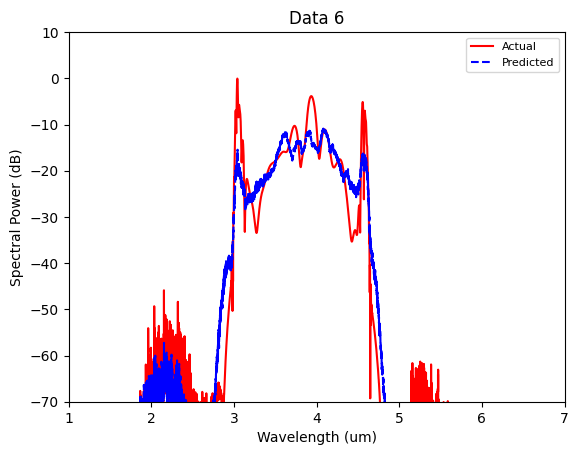

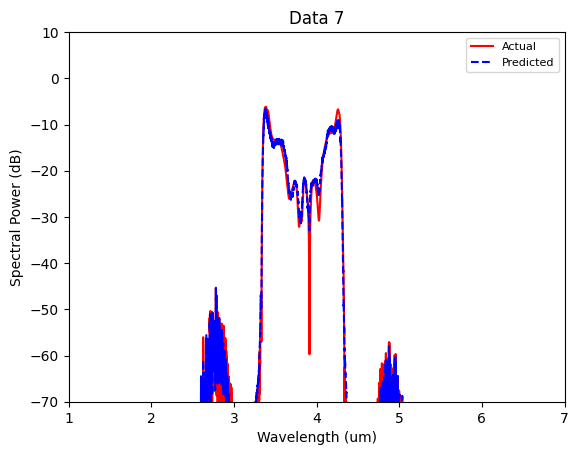

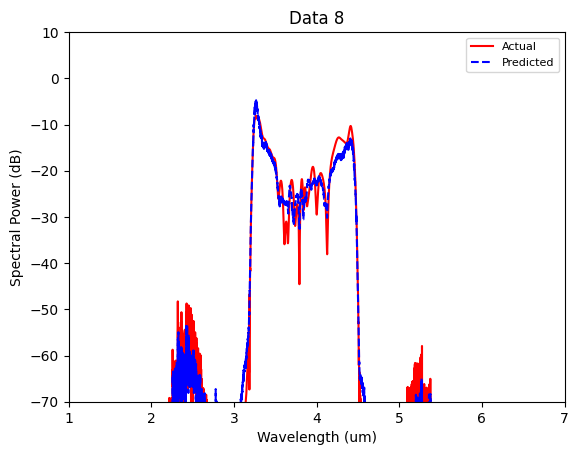

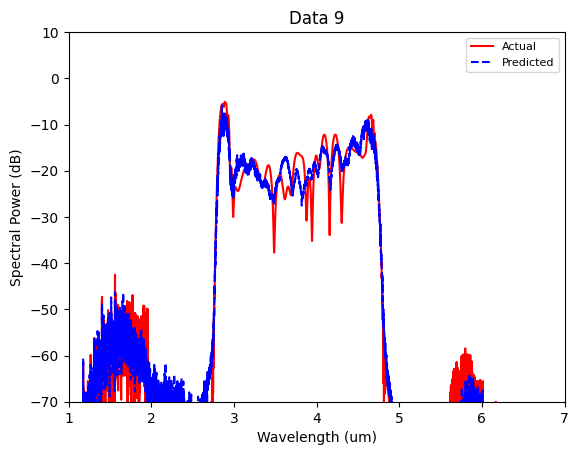

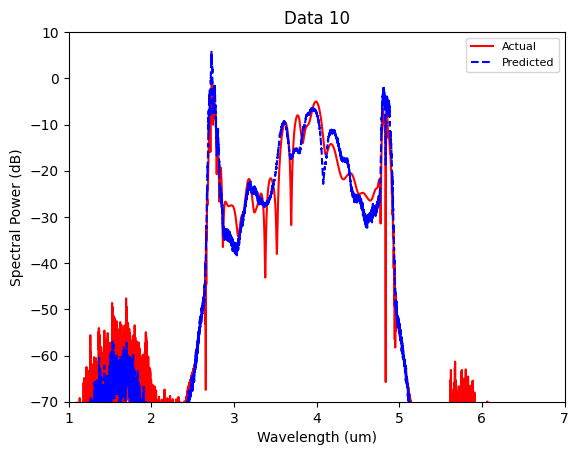

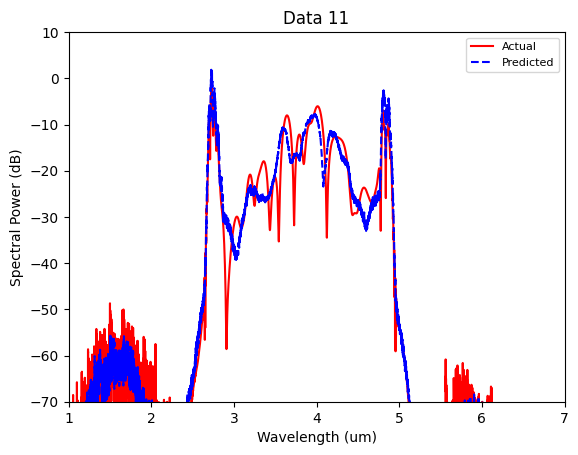

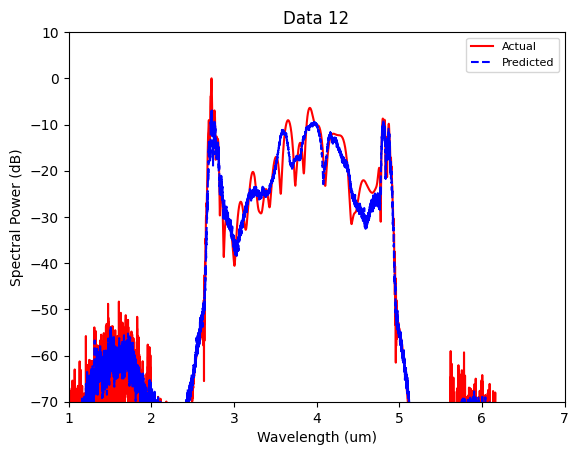

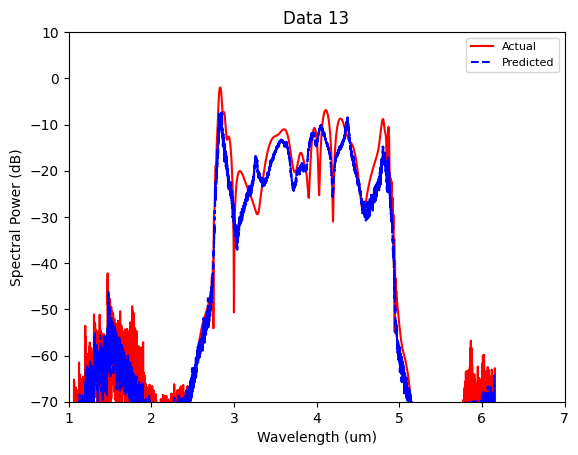

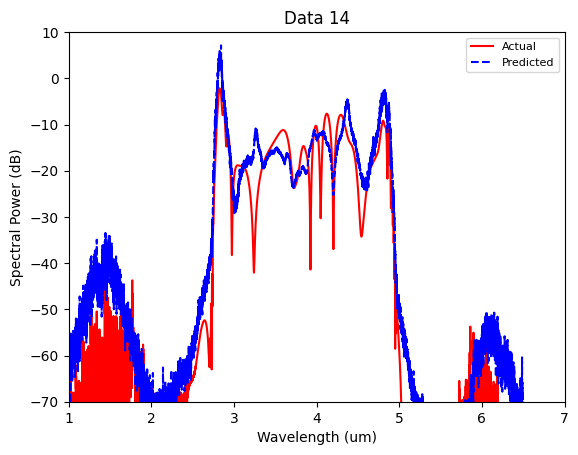

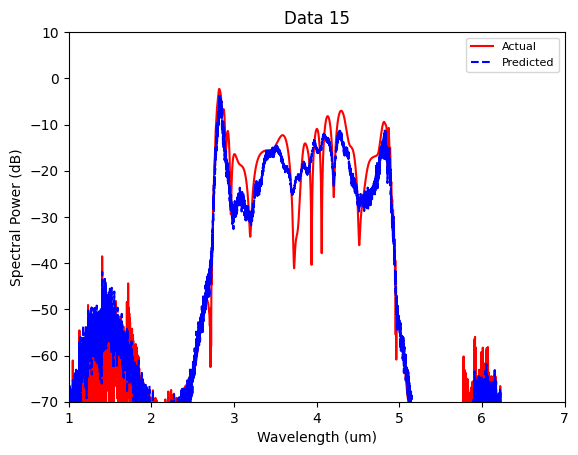

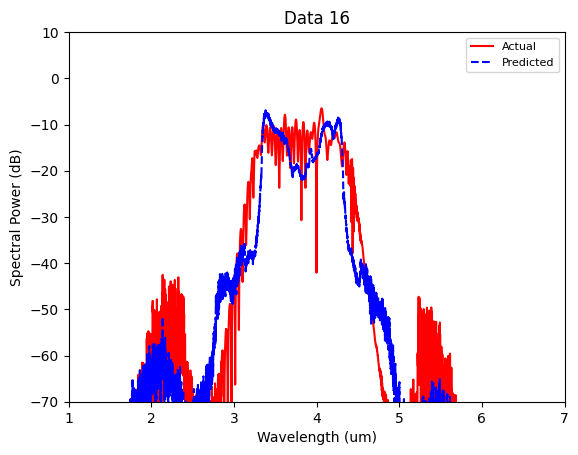

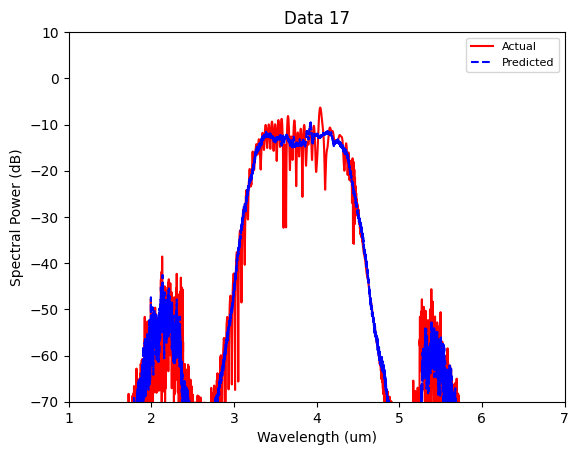

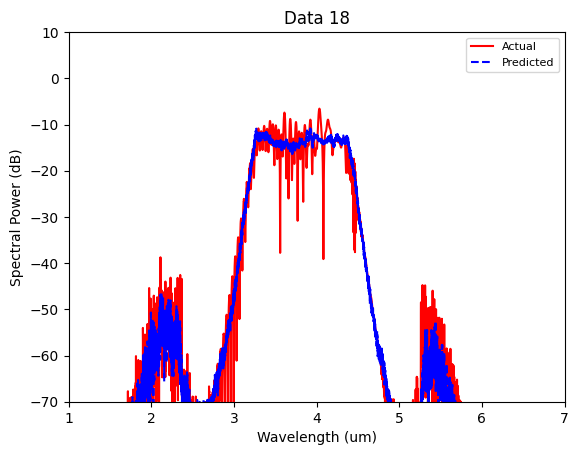

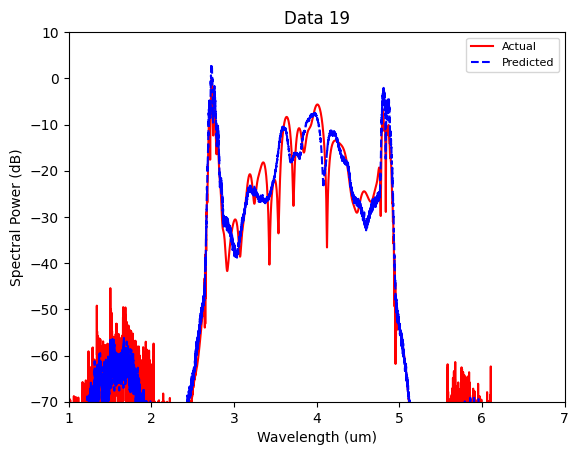

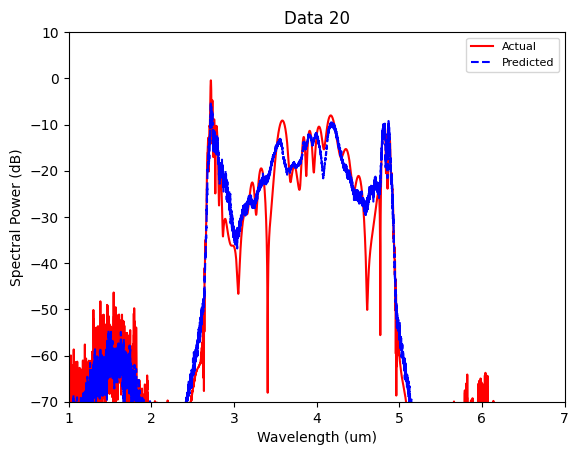

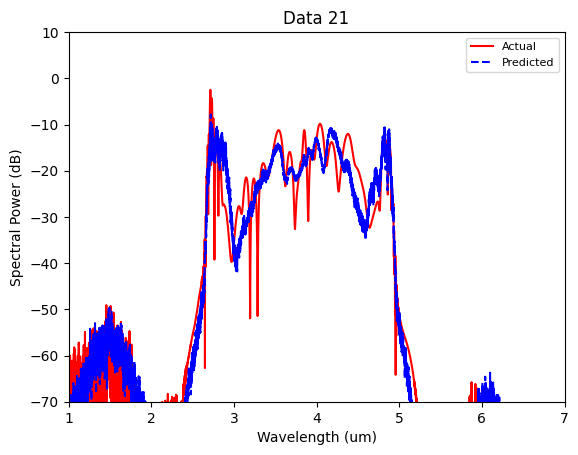

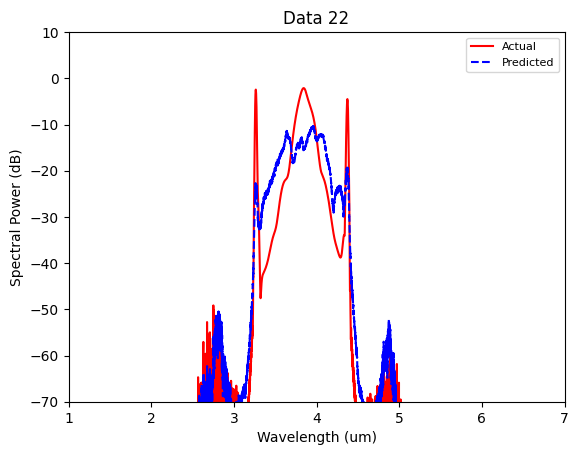

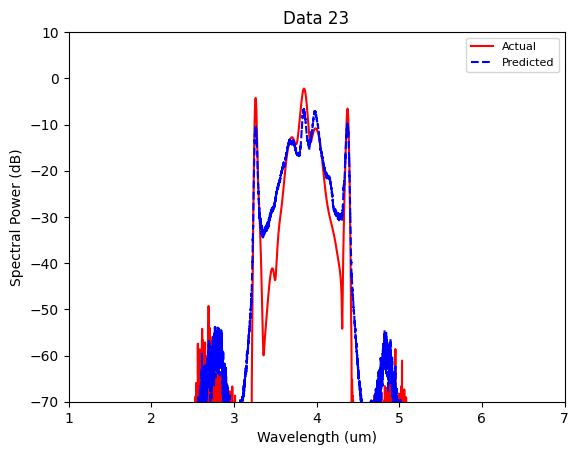

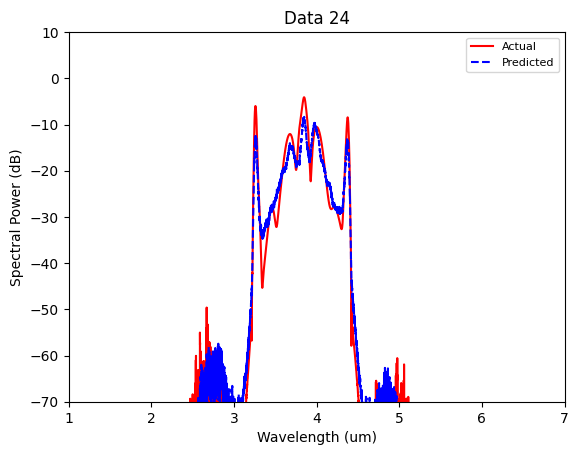

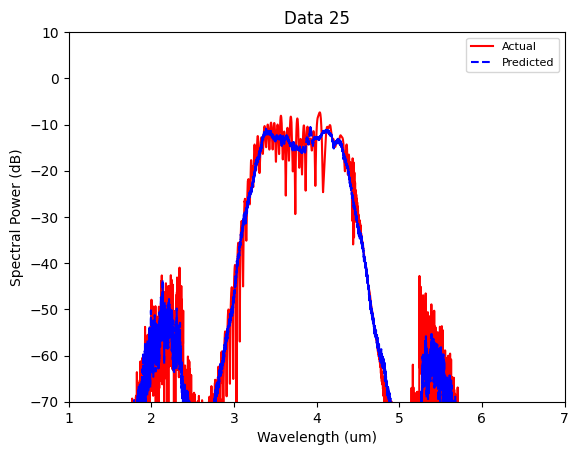

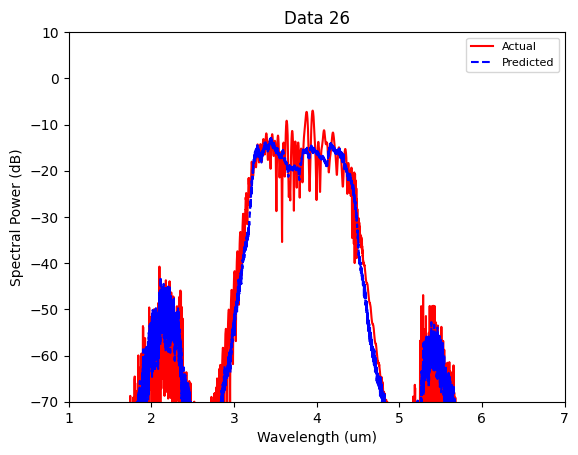

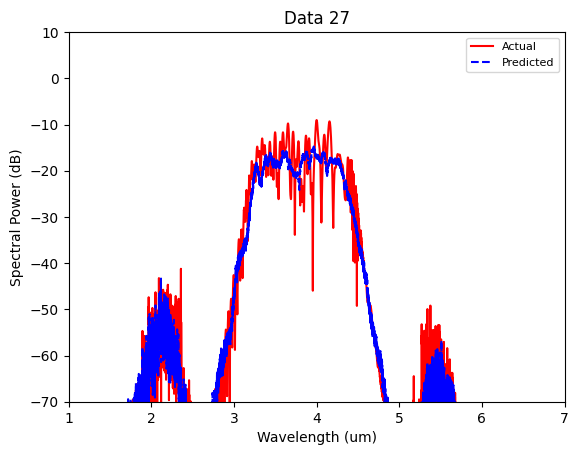

end_time:  1713848540.0724497
time taken to train in sec:  311.11607909202576


In [ ]:
'''
FileFilenamename: /home/st4eve/ltc_cisc867/supercontinuum_generation/model.py
FilenameFilename /home/st4eve/ltc_cisc867/supercontinuum_generation
Created Date: Tuesday, October 30th, 2023, 2:05:00 PM
Author: Tristan Austin

Model to train LTC/CfC on supercontinuum dataset.
'''
#%%
import time
start_time = time.time()
import tensorflow as tf
!pip install ncps
from ncps.tf import LTC, CfC
from ncps import wirings
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

X_train = np.reshape(X_train, (X_train.shape[0], 5, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 5, 1))
X_validation = np.reshape(X_validation, (X_validation.shape[0], 5, 1))

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_validation = tf.convert_to_tensor(X_validation, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_validation = tf.convert_to_tensor(y_validation, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

'''
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(5, 1)),  # Adjust the input shape here
     CfC(200, return_sequences=True),
     CfC(200, return_sequences=True),
     CfC(200, return_sequences=False),
    tf.keras.layers.Dense(2**9, activation='tanh'),
    tf.keras.layers.Dense(2**13, activation=None)
])
'''




import tensorflow as tf


model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(5, 1)),
    tf.keras.layers.LSTM(200, activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(200, activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(200, activation='tanh', return_sequences=False),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2**9, activation='tanh'),
    tf.keras.layers.Dense(2**13, activation=None)
])



'''
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(5, 1)),
    tf.keras.layers.LSTM(120, activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(120, activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(120, activation='tanh', return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2**9, activation='tanh'),
    tf.keras.layers.Dense(2**13, activation=None)
])
'''
'''

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(7, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(2**9,activation='tanh'),
    tf.keras.layers.Dense(2**13,activation=None)
])
'''
lr_schedule_cfc = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0005,
    decay_steps=1000,
    decay_rate=0.8)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule_cfc),
    loss=tf.keras.losses.MeanSquaredError(),
)


if __name__ == '__main__':
    print(model.summary())
   # print(model_dense.summary())


hist = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_validation ,y_validation ))
plt.figure()
plt.plot(hist.history['loss'], 'r-',label='Training Loss')
plt.plot(hist.history['val_loss'],'b-',label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()
#hist_dense = model_dense.fit(X_train, y_train, batch_size=32, epochs=2000, verbose=1, validation_data=(X_validation ,y_validation ))

model.save_weights('SC_GEN_MODEL.h5')
#model_dense.save_weights('SC_GEN_MODEL_DENSE.h5')
df = pd.DataFrame(hist.history)

#df_dense = pd.DataFrame(hist_dense.history)
df.to_pickle('SC_GEN_MODEL_HISTORY.pkl')
#df_dense.to_pickle('SC_GEN_MODEL_DENSE_HISTORY.pkl')

%load_ext autoreload
%autoreload 2
import tensorflow as tf
from ncps.tf import LTC, CfC
from ncps import wirings
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.signal import argrelextrema
import copy



model = model
#model_dense = model_dense
model.load_weights('SC_GEN_MODEL.h5')
#model_dense.load_weights('SC_GEN_MODEL_DENSE.h5')

print(y_test.shape)
y_pred = model.predict(X_test)
#y_pred_dense = model_dense.predict(X_test)
model.evaluate(X_test, y_test)
#model_dense.evaluate(X_test, y_test)


#y_pred_dense = scaler2.inverse_transform(y_pred_dense)


#y_pred_dense[y_pred_dense < -80.] = -80.
predicted_on_X_test=y_pred

x = np.arange(0.7, 7, 6.3/8192)
x = x[::-1]


# Loop over your data
for i in range(len(y_test)):
    y_actual = scaler2.inverse_transform(y_test)[i, :]
    z_predicted = scaler2.inverse_transform(predicted_on_X_test)[i, :]

    plt.figure()
    plt.plot(x, y_actual, 'r-', label='Actual')
    plt.plot(x, z_predicted, 'b--', label='Predicted')
    plt.legend(fontsize=8)
    plt.xlabel('Wavelength (um)', fontsize=10)
    plt.ylabel('Spectral Power (dB)', fontsize=10)
    plt.ylim(-70, 10)
    plt.xlim(1, 7)
    plt.title(f'Data {i+1}', fontsize=12)  # Add a title to differentiate plots

plt.show()

import pandas as pd
z_predicted = scaler2.inverse_transform(predicted_on_X_test)
# Save predicted values to Excel
for i in range(len(predicted_on_X_test)):
    df_predicted = pd.DataFrame({f'{i+1}':z_predicted[i]})
    predicted_filepath = f'/content/drive/MyDrive/LTC 3 MATERIAL/Predicted_Data_{i+1}.xlsx'
    df_predicted.to_excel(predicted_filepath, sheet_name='sheet1', index=False)
end_time = time.time()
print('end_time: ', end_time)
print('time taken to train in sec: ', (end_time - start_time))
